In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [33]:
data = pd.read_excel('merged_data.xlsx')

In [34]:
data.head(3)

,일련번호,순위수,입력일자,ISBN13번호,서적제목명,저작자명,출판사명,발행일자,서적마스터일련번호,KDC명,...,분석기간코드명,분석유형코드,분석유형코드명,연령구분명,지역명,성별구분명,권명,분석대출총수,판매량,별점
0,309418784,285,2021-12-15,9791197522901,당신의 수익은 우연입니다 :제보자 X가 말하는 주식시장의 속살,지은이: 이오하,영화나무,2021,6049990,327.856,...,90일,5,연령 및 성별,50대,NaN,남성,NaN,723129,1050,9.2
1,309260376,479,2021-12-15,9791197522901,당신의 수익은 우연입니다 :제보자 X가 말하는 주식시장의 속살,지은이: 이오하,영화나무,2021,6049990,327.856,...,7일,3,지역별,NaN,제주,NaN,NaN,29058,1050,9.2
2,309274859,251,2021-12-15,9791197522901,당신의 수익은 우연입니다 :제보자 X가 말하는 주식시장의 속살,지은이: 이오하,영화나무,2021,6049990,327.856,...,7일,4,연령 및 성별,50대,NaN,남성,NaN,55829,1050,9.2


In [35]:
cols = ['판매량' , '별점']

d = data[cols]

d.describe()

,판매량,별점
count,154064.000000,154064.000000
mean,11208.749377,9.090588
std,32015.850311,1.874860
min,0.000000,0.000000
25%,264.000000,9.200000
50%,2076.000000,9.600000
75%,7269.000000,9.700000
max,410166.000000,10.000000


In [36]:
d = d.replace({0 : np.NaN})

In [37]:
print(f"Before Drop Missing value : {d.shape[0]} \nAfter Drop Missing value : {d.dropna().shape[0]}")

Before Drop Missing value : 154064 
After Drop Missing value : 130135


In [41]:
drop_data = d.dropna()

In [42]:
drop_data.describe()

,판매량,별점
count,130135.000000,130135.000000
mean,13269.042441,9.474552
std,34440.729107,0.420767
min,12.000000,2.000000
25%,912.000000,9.300000
50%,3150.000000,9.600000
75%,9762.000000,9.800000
max,410166.000000,10.000000


<Axes: xlabel='판매량'>

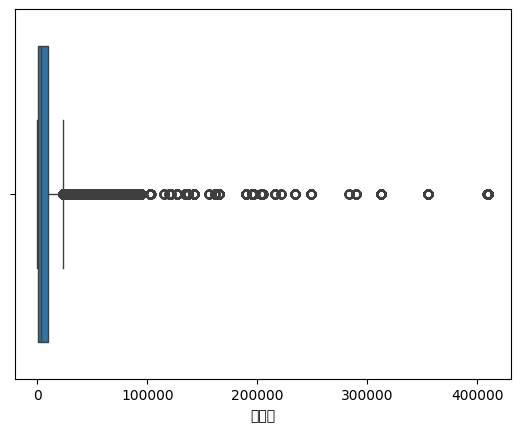

In [43]:
sns.boxplot(
    data = drop_data ,
    x = '판매량'
)

<Axes: xlabel='별점'>

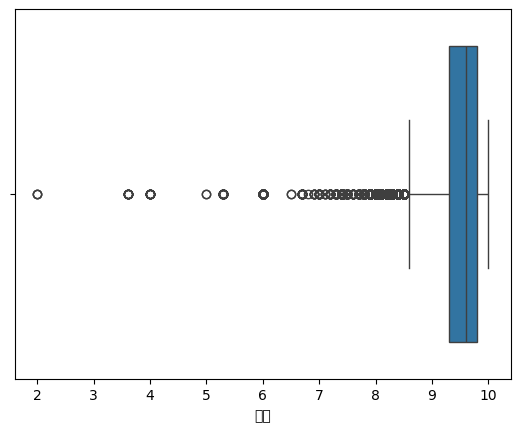

In [44]:
sns.boxplot(
    data = drop_data,
    x = '별점'
)

In [51]:
def outlier_detection(data , col):
    q1 = np.percentile(data[col] , 25)
    q3 = np.percentile(data[col] , 75)
    IQR = q3 - q1
    
    upper_fence = q3 + 1.5 * IQR
    lower_fence = q1 - 1.5 * IQR

    return data[(data[col] < lower_fence) | (data[col] > upper_fence)]

In [56]:
# 이상치

sale_outlier = outlier_detection(data , '판매량')
print(f"판매량 이상치 비율 : {round(len(sale_outlier) / len(data) * 100 , 2)}%")
score_outlier = outlier_detection(data , '별점')
print(f"별점 이상치 비율 : {round(len(score_outlier) / len(data) * 100 , 2)}%")

판매량 이상치 비율 : 14.46%
별점 이상치 비율 : 6.59%


In [59]:
cols = ['순위수' , '발행일자' , 'KDC 대분류' , '대출수' , '연령구분명' , '성별구분명' , '별점']

sale_outlier[cols]

,순위수,발행일자,KDC 대분류,대출수,연령구분명,성별구분명,별점
111,461,2021,100 (철학),62,50대,남성,9.1
112,244,2021,100 (철학),4,20대,남성,9.1
113,121,2021,100 (철학),8,NaN,NaN,9.1
114,127,2021,100 (철학),64,60대 이상,여성,9.1
115,667,2021,100 (철학),47,60대 이상,남성,9.1
...,...,...,...,...,...,...,...
153978,895,1999,800 (문학),17,청소년(14~19),NaN,9.2
153979,621,1999,800 (문학),13,청소년(14~19),여성,9.2
153980,710,1999,800 (문학),2,20대,남성,9.2
153981,452,1999,800 (문학),2,청소년(14~19),남성,9.2
